# Project3
### Group member：
Chen Sun #906092466， Zile Zhan #206092634， Ziyu Zeng #306092539， Jennifer Qin #306083747

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from RegscorePy import mallow
import itertools
from BorutaShap import BorutaShap
import statsmodels.api as sm
from matplotlib.ticker import ScalarFormatter
from statsmodels.graphics.regressionplots import plot_ceres_residuals
import linearmodels as plm

# I. Panel Data Models

### 1. Briefly discuss your data and economic/finance/business question you are trying to answer with your model.

Dataset Description
Data Set contains Cost Data for U.S. Airlines, 90 Observations On 6 Firms For 15 Years, 1970-1984

These are the columns which I have inside my dataset:
1.I = Airline,
2.T = Year,
3.Q = Output, in revenue passenger miles, index number,
4.PF = Fuel price,
5.LF = Load factor, the average capacity utilization of the fleet.

target variable:
C = Total cost, in $1000

Our question: How will the factors affect total cost of U.S. Airlines.

In [12]:
df=pd.read_csv('Paneldata.csv', encoding = 'utf-8')

In [13]:
df.head()

,I,T,C,Q,PF,LF
0,1,1,1140640,0.952757,106650,0.534487
1,1,2,1215690,0.986757,110307,0.532328
2,1,3,1309570,1.091980,110574,0.547736
3,1,4,1511530,1.175780,121974,0.540846
4,1,5,1676730,1.160170,196606,0.591167


In [14]:
print(df.index)

RangeIndex(start=0, stop=90, step=1)


### 2. Descriptive Analysis

lambda of C = 0.046990952069752234 , which approximately equals to zero.


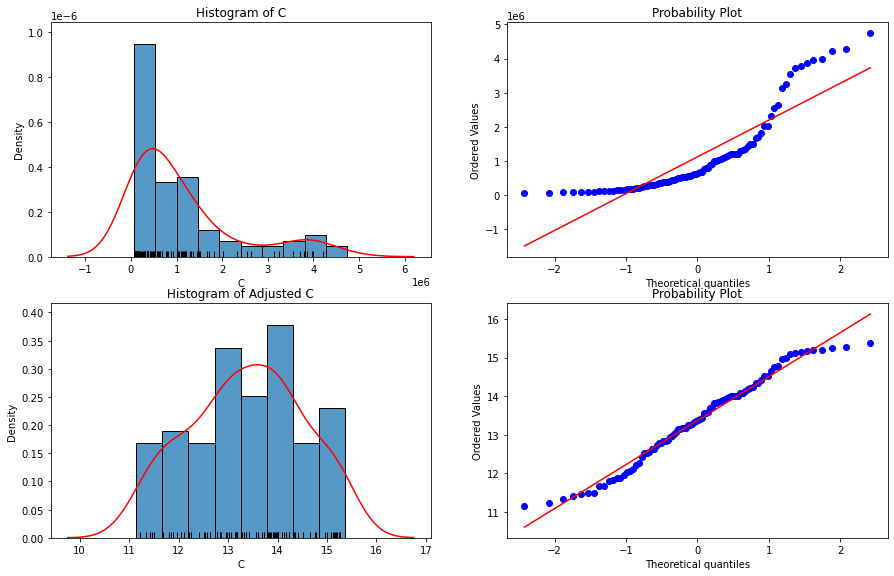

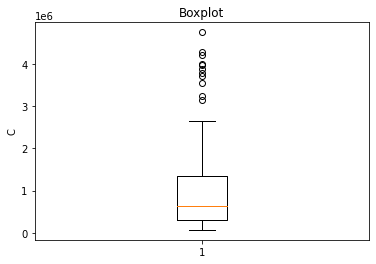

In [15]:
# TEST for Transformation
bc_C,lambda_C = stats.boxcox(df['C'])
print('lambda of C =', lambda_C,', which approximately equals to zero.')
fig=plt.figure(figsize=(15,25))

# Before Transformation
ax=fig.add_subplot(5,2,1) 
sns.histplot(df['C'],stat = 'density')
sns.kdeplot(df['C'], color = 'red')
sns.rugplot(df['C'], color = 'black')
ax.set_title('Histogram of C')

ax=fig.add_subplot(5,2,2) 
stats.probplot(df['C'], dist = 'norm', plot = plt)

# After Transformation
ax=fig.add_subplot(5,2,3)
sns.histplot(np.log(df['C']),stat = 'density')
sns.kdeplot(np.log(df['C']), color = 'red')
sns.rugplot(np.log(df['C']), color = 'black')
ax.set_title('Histogram of Adjusted C')

ax=fig.add_subplot(5,2,4)
stats.probplot(np.log(df['C']), dist = 'norm', plot = plt)
plt.show()

# Boxplot
ax=fig.add_subplot(5,2,5)
plt.boxplot(df['C'])
plt.ylabel('C')
plt.title('Boxplot')
plt.show()

df['C'] = np.log(df['C'])

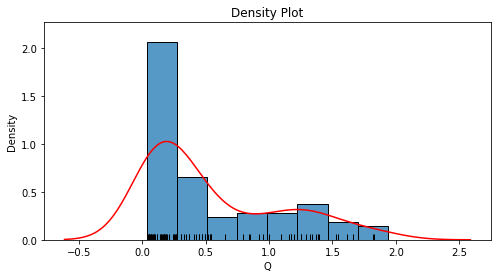

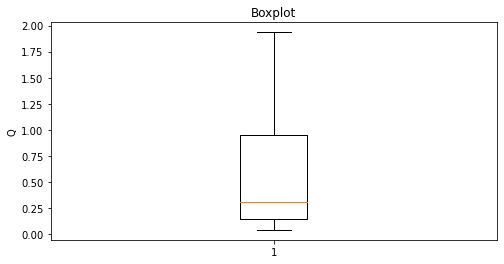

<Figure size 576x288 with 0 Axes>

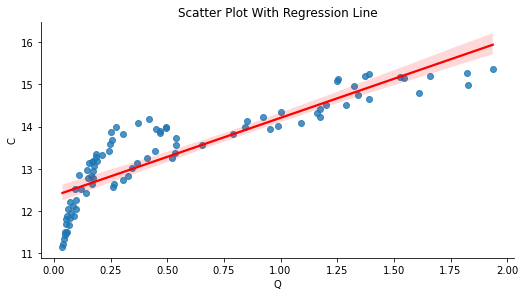

lambda = 0.05383424479390991 , which approximately equals to zero.


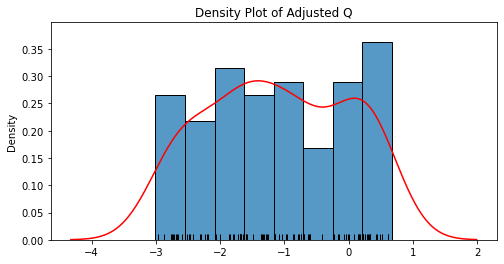

In [16]:
# Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['Q'],stat = 'density')
sns.kdeplot(df['Q'], color = 'red')
sns.rugplot(df['Q'], color = 'black')
plt.title('Density Plot')
plt.show()

# Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['Q'])
plt.ylabel('Q')
plt.title('Boxplot')
plt.show()

# Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df,x='Q',y='C',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

# Check for Linear Transformation
bc_Q,lambda_Q  = stats.boxcox(df['Q'])
print('lambda =', lambda_Q,', which approximately equals to zero.')
plt.figure(figsize = (8,4))
plt.title('Density Plot of Adjusted Q')
sns.histplot(bc_Q, stat = 'density')
sns.kdeplot(bc_Q, color = 'red')
sns.rugplot(bc_Q, color = 'black')
plt.show()

df['Q'] = np.log(df['Q'])

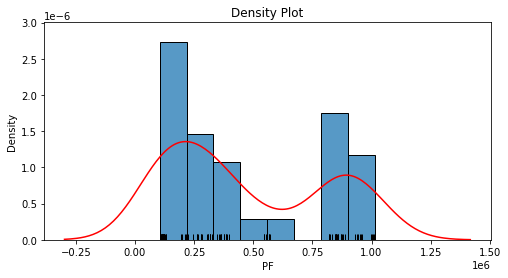

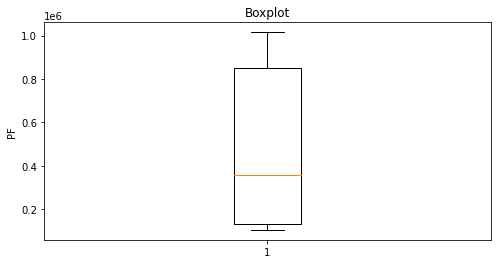

<Figure size 576x288 with 0 Axes>

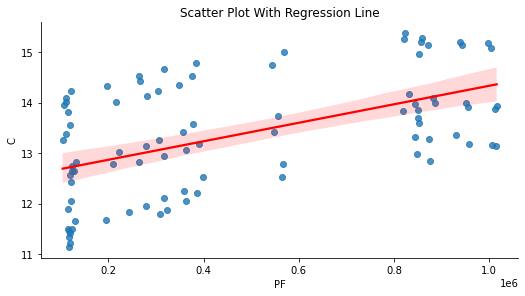

lambda = 0.13220113133673236 , which approximately equals to zero.


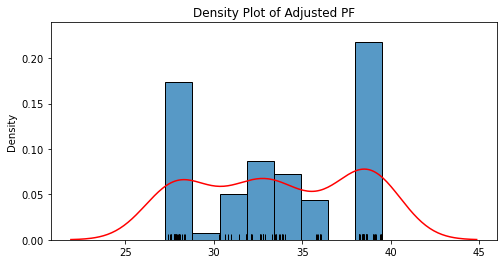

In [17]:
# Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['PF'],stat = 'density')
sns.kdeplot(df['PF'], color = 'red')
sns.rugplot(df['PF'], color = 'black')
plt.title('Density Plot')
plt.show()

# Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['PF'])
plt.ylabel('PF')
plt.title('Boxplot')
plt.show()

# Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df,x='PF',y='C',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

# Check for Linear Transformation
bc_PF,lambda_PF  = stats.boxcox(df['PF'])
print('lambda =', lambda_PF,', which approximately equals to zero.')
plt.figure(figsize = (8,4))
plt.title('Density Plot of Adjusted PF')
sns.histplot(bc_PF, stat = 'density')
sns.kdeplot(bc_PF, color = 'red')
sns.rugplot(bc_PF, color = 'black')
plt.show()

df['PF'] = np.log(df['PF'])

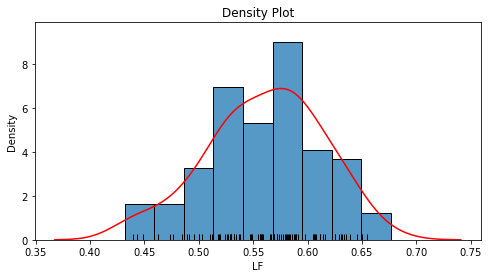

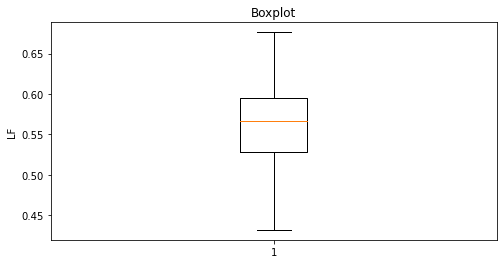

<Figure size 576x288 with 0 Axes>

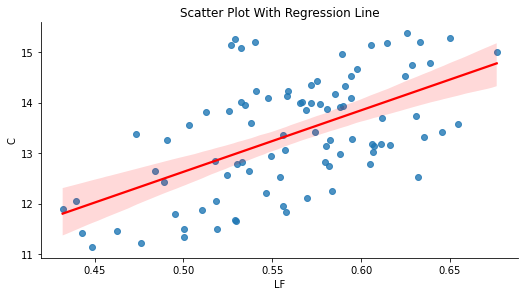

lambda = 2.2046249343748214 , which approximately equals to 2.


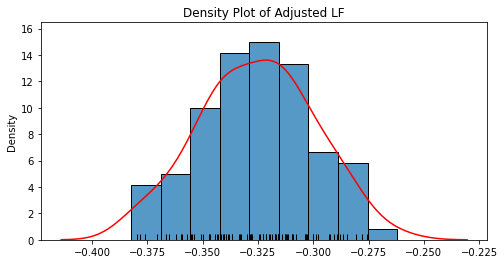

In [18]:
# Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['LF'],stat = 'density')
sns.kdeplot(df['LF'], color = 'red')
sns.rugplot(df['LF'], color = 'black')
plt.title('Density Plot')
plt.show()

# Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['LF'])
plt.ylabel('LF')
plt.title('Boxplot')
plt.show()

# Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df,x='LF',y='C',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

# Check for Linear Transformation
bc_LF,lambda_LF  = stats.boxcox(df['LF'])
print('lambda =', lambda_LF,', which approximately equals to 2.')
plt.figure(figsize = (8,4))
plt.title('Density Plot of Adjusted LF')
sns.histplot(bc_LF, stat = 'density')
sns.kdeplot(bc_LF, color = 'red')
sns.rugplot(bc_LF, color = 'black')
plt.show()

df['LF'] = pow(df['LF'],2)

### 3. Pooled model vs Fixed effect model vs Random effect model.

In [19]:
# estimate different models:
df.rename(columns = {'C':'cost'},inplace = True)

df = df.set_index(['I', 'T'], drop=False)

reg_ols = plm.PooledOLS.from_formula(
    formula='cost ~ Q + PF + LF + C(T)', data=df)
results_ols = reg_ols.fit()

reg_re = plm.RandomEffects.from_formula(
    formula='cost ~ Q + PF + LF + C(T)', data=df)
results_re = reg_re.fit()

reg_fe = plm.PanelOLS.from_formula(
    formula='cost ~ Q + PF + LF + C(T) + EntityEffects', data=df)
results_fe = reg_fe.fit()

# print results:
theta_hat = results_re.theta.iloc[0, 0]
print(f'theta_hat: {theta_hat}\n')

table_ols = pd.DataFrame({'b': round(results_ols.params, 4),
                          'se': round(results_ols.std_errors, 4),
                          't': round(results_ols.tstats, 4),
                          'pval': round(results_ols.pvalues, 4)})
print(f'table_ols: \n{table_ols}\n')

table_re = pd.DataFrame({'b': round(results_re.params, 4),
                         'se': round(results_re.std_errors, 4),
                         't': round(results_re.tstats, 4),
                         'pval': round(results_re.pvalues, 4)})
print(f'table_re: \n{table_re}\n')

table_fe = pd.DataFrame({'b': round(results_fe.params, 4),
                         'se': round(results_fe.std_errors, 4),
                         't': round(results_fe.tstats, 4),
                         'pval': round(results_fe.pvalues, 4)})
print(f'table_fe: \n{table_fe}\n')


theta_hat: 0.0

table_ols: 
                  b      se        t    pval
C(T)[T.1]   19.8549  4.2380   4.6849  0.0000
C(T)[T.2]   19.9339  4.2500   4.6903  0.0000
C(T)[T.3]   20.0030  4.2523   4.7040  0.0000
C(T)[T.4]   20.0874  4.2740   4.6999  0.0000
C(T)[T.5]   20.5381  4.4693   4.5954  0.0000
C(T)[T.6]   20.7487  4.5684   4.5418  0.0000
C(T)[T.7]   20.8386  4.6013   4.5289  0.0000
C(T)[T.8]   20.9878  4.6530   4.5106  0.0000
C(T)[T.9]   21.1674  4.6864   4.5168  0.0000
C(T)[T.10]  21.4500  4.8230   4.4475  0.0000
C(T)[T.11]  21.7925  4.9819   4.3743  0.0000
C(T)[T.12]  21.9771  5.0409   4.3597  0.0000
C(T)[T.13]  21.9434  5.0184   4.3726  0.0000
C(T)[T.14]  21.8805  4.9880   4.3866  0.0000
C(T)[T.15]  21.8660  4.9726   4.3973  0.0000
LF          -1.7115  0.3957  -4.3253  0.0000
PF          -0.4760  0.3660  -1.3006  0.1976
Q            0.8668  0.0154  56.1527  0.0000

table_re: 
                  b      se        t    pval
C(T)[T.1]   19.8549  4.2380   4.6849  0.0000
C(T)[T.2]   19.

In [42]:
results_fe.summary

Dep. Variable:,cost,R-squared:,0.9957
Estimator:,PanelOLS,R-squared (Between):,0.9828
No. Observations:,90,R-squared (Within):,0.9957
Date:,"Fri, Dec 02 2022",R-squared (Overall):,0.9873
Time:,16:01:36,Log-likelihood,154.82
Cov. Estimator:,Unadjusted,,
,,F-statistic:,914.55
Entities:,6,P-value,0.0000
Avg Obs:,15.000,Distribution:,"F(17,67)"
Min Obs:,15.000,,
Max Obs:,15.000,F-statistic (robust):,6300.7


In [40]:
print(results_fe.f_pooled)

Pooled F-statistic
H0: Effects are zero
Statistic: 73.7070
P-value: 0.0000
Distributed: F(5,67)


In [43]:
b_fe = results_fe.params
b_fe_cov = results_fe.cov

b_re = results_re.params
b_re_cov = results_re.cov

# Hausman test of FE vs. RE
# (I) find overlapping coefficients:
common_coef = set(results_fe.params.index).intersection(results_re.params.index)

# (II) calculate differences between FE and RE:
b_diff = np.array(results_fe.params[common_coef] - results_re.params[common_coef])
df = len(b_diff)
b_diff.reshape((df, 1))
b_cov_diff = np.array(b_fe_cov.loc[common_coef, common_coef] -
                      b_re_cov.loc[common_coef, common_coef])
b_cov_diff.reshape((df, df))

# (III) calculate test statistic:
stat = abs(np.transpose(b_diff) @ np.linalg.inv(b_cov_diff) @ b_diff)
pval = 1 - stats.chi2.cdf(stat, df)

print(f'stat: {stat}\n')
print(f'pval: {pval}\n')

stat: 8.506761952968425

pval: 0.9700987478607017



Since the F-test for Poolability is 73.7070 and P-value is 0.00, we can claim that there exist some effects which make betas not equal to each other. So, we choose fixed effect model over pooled model. Then By using Hausman test, we choose random effect model over fixed effect model because the high p-value which suggests that there is little serial correlation.Thus, we choose random effect model as our preferred model becasue random effect model > fixed effect model > pooled model.

# II. Qualitative Dependent Variable Models

### 1. Briefly discuss your data and economic/finance/business question you are trying to answer with your model.

Dataset Description
A number of features in the dataset are used to predict the presence or absence of a cardiovascular disease.

This are the columns which I have inside my dataset:
1.AGE:  integer (years of age)

2.HEIGHT: integer (cm) 

3.WEIGHT: integer (kg)

4.GENDER: categorical (1: female, 2: male)

5.AP_HIGH: systolic blood pressure, integer

6.AP_LOW: diastolic blood pressure, integer 

7.CHOLESTEROL: categorical (1: normal, 2: above normal, 3: well above normal)

8.GLUCOSE: categorical (1: normal, 2: above normal, 3: well above normal)

9.SMOKE: categorical (0: no, 1: yes)

10.ALCOHOL: categorical (0: no, 1: yes)

11.PHYSICAL_ACTIVITY: categorical (0: no, 1: yes)


target variable:
CARDIO_DISEASE:  categorical (0: no, 1: yes)

Our question: How will the factors affect the probability to get cardio_disease.

In [45]:
df2=pd.read_csv('cardiovascular_diseases_dv3.csv',sep = ';')

In [46]:
df2.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [47]:
df2.describe()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,1.348749,164.361252,74.121934,126.614585,81.381591,1.364727,1.225986,0.088001,0.053632,0.803367,0.494904
std,6.768163,0.476578,8.184850,14.331392,16.763763,9.676679,0.678976,0.571961,0.283299,0.225293,0.397455,0.499978
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


### 2. Descriptive Analysis

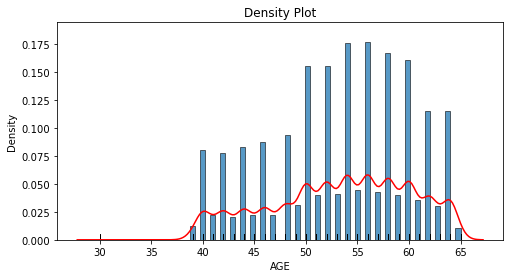

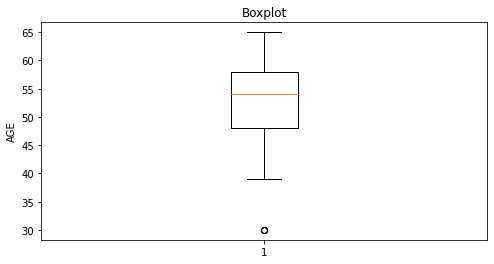

<Figure size 576x288 with 0 Axes>

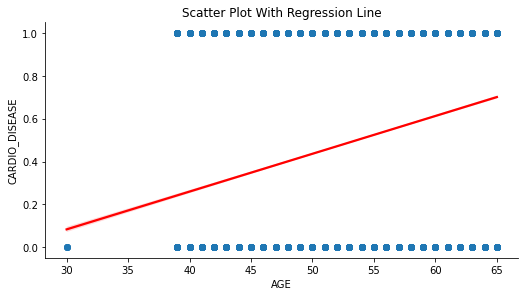

lambda = 2.0467295167299406 , which approximately equals to 2.


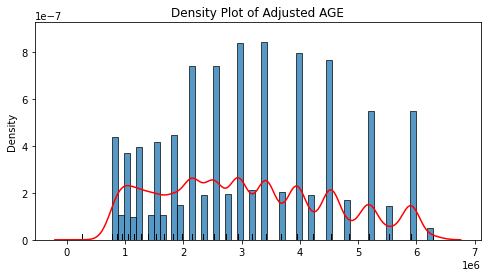

In [20]:
# Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df2['AGE'],stat = 'density')
sns.kdeplot(df2['AGE'], color = 'red')
sns.rugplot(df2['AGE'], color = 'black')
plt.title('Density Plot')
plt.show()

# Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df2['AGE'])
plt.ylabel('AGE')
plt.title('Boxplot')
plt.show()

# Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df2,x='AGE',y='CARDIO_DISEASE',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

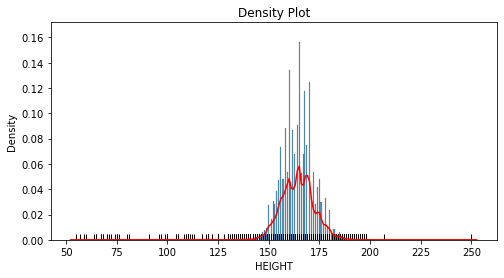

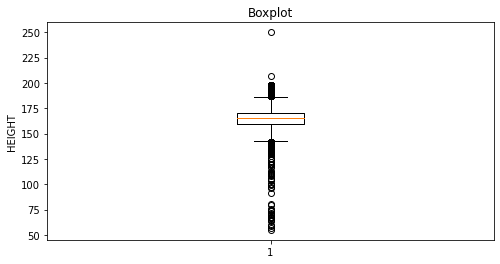

<Figure size 576x288 with 0 Axes>

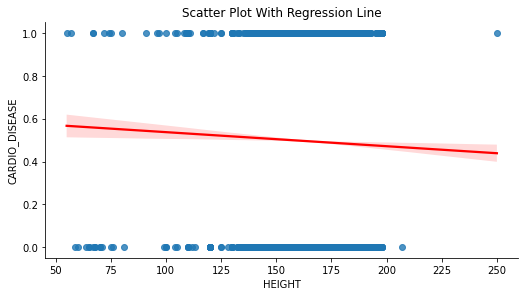

lambda = 2.3972967118511788 , which approximately equals to 2.


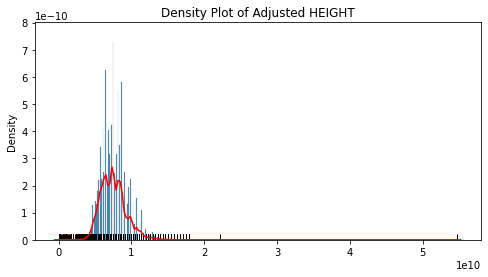

In [21]:
# Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df2['HEIGHT'],stat = 'density')
sns.kdeplot(df2['HEIGHT'], color = 'red')
sns.rugplot(df2['HEIGHT'], color = 'black')
plt.title('Density Plot')
plt.show()

# Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df2['HEIGHT'])
plt.ylabel('HEIGHT')
plt.title('Boxplot')
plt.show()

# Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df2,x='HEIGHT',y='CARDIO_DISEASE',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

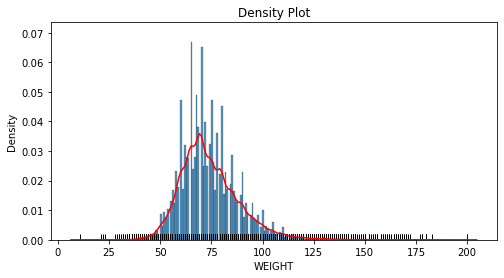

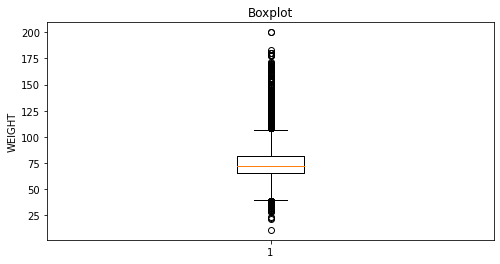

<Figure size 576x288 with 0 Axes>

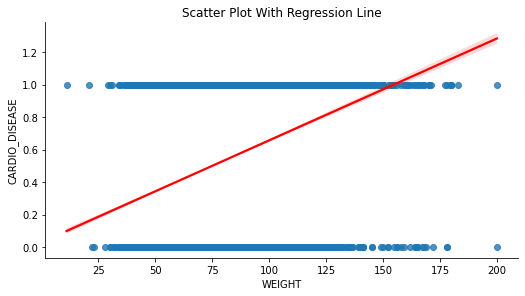

lambda = -0.29735317159583785 , which approximately equals to 0.


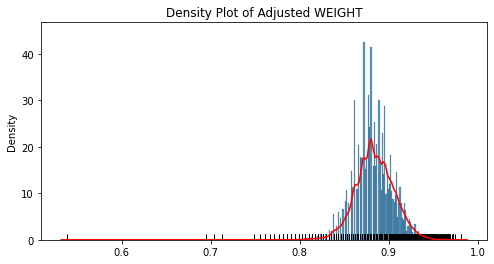

In [22]:
# Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df2['WEIGHT'],stat = 'density')
sns.kdeplot(df2['WEIGHT'], color = 'red')
sns.rugplot(df2['WEIGHT'], color = 'black')
plt.title('Density Plot')
plt.show()

# Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df2['WEIGHT'])
plt.ylabel('WEIGHT')
plt.title('Boxplot')
plt.show()

# Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df2,x='WEIGHT',y='CARDIO_DISEASE',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

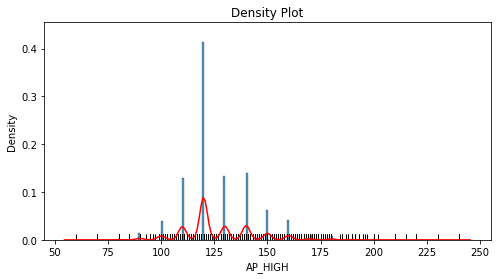

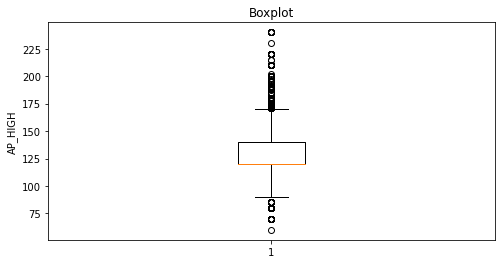

<Figure size 576x288 with 0 Axes>

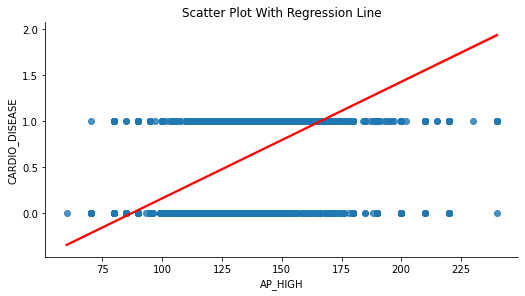

lambda = -0.6772650181464362 , which approximately equals to 0.


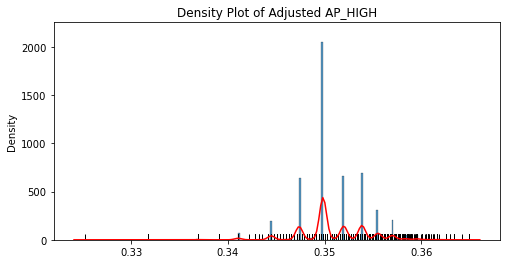

In [25]:
# Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df2['AP_HIGH'],stat = 'density')
sns.kdeplot(df2['AP_HIGH'], color = 'red')
sns.rugplot(df2['AP_HIGH'], color = 'black')
plt.title('Density Plot')
plt.show()

# Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df2['AP_HIGH'])
plt.ylabel('AP_HIGH')
plt.title('Boxplot')
plt.show()

# Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df2,x='AP_HIGH',y='CARDIO_DISEASE',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

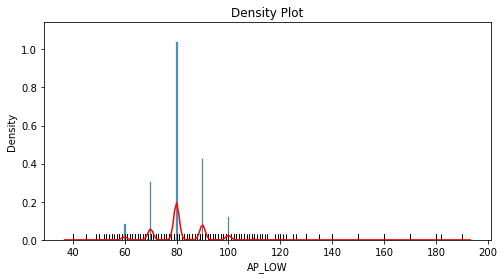

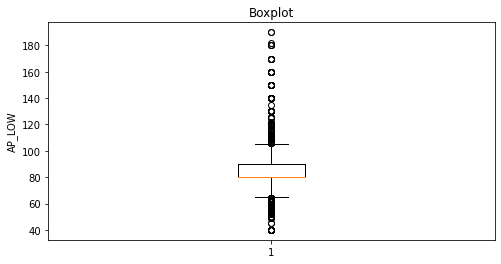

<Figure size 576x288 with 0 Axes>

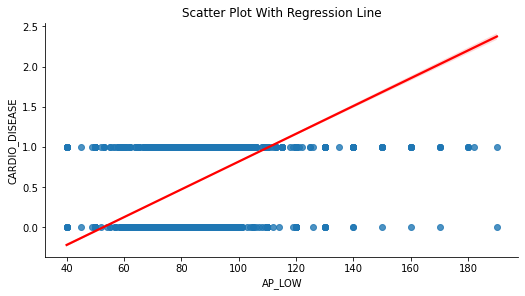

lambda = 0.19636791671338275 , which approximately equals to 0.


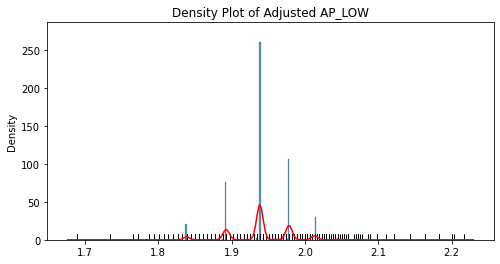

In [24]:
# Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df2['AP_LOW'],stat = 'density')
sns.kdeplot(df2['AP_LOW'], color = 'red')
sns.rugplot(df2['AP_LOW'], color = 'black')
plt.title('Density Plot')
plt.show()

# Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df2['AP_LOW'])
plt.ylabel('AP_LOW')
plt.title('Boxplot')
plt.show()

# Scatter plot with regression line
plt.figure(figsize = (8,4))
sns.lmplot(data=df2,x='AP_LOW',y='CARDIO_DISEASE',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

### 3. OLS vs Logit Model vs Probit Model

In [49]:
# Estimate a linear probability model:
reg_lin = smf.ols(formula='CARDIO_DISEASE ~ AGE + GENDER + HEIGHT + WEIGHT + AP_HIGH + AP_LOW + CHOLESTEROL +'
       'GLUCOSE + SMOKE + ALCOHOL + PHYSICAL_ACTIVITY', data = df2)
results_lin = reg_lin.fit(cov_type='HC3')

print(f'results_lin.summary(): \n{results_lin.summary()}\n')

# log likelihood value:
print(f'results_lin.llf: {results_lin.llf}\n')

results_lin.summary(): 
                            OLS Regression Results                            
Dep. Variable:         CARDIO_DISEASE   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     2134.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:00:20   Log-Likelihood:                -41035.
No. Observations:               68783   AIC:                         8.209e+04
Df Residuals:                   68771   BIC:                         8.220e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept     

In [50]:
# Estimate a probit model:
reg_probit = smf.probit(formula='CARDIO_DISEASE ~ AGE + GENDER + HEIGHT + WEIGHT + AP_HIGH + AP_LOW + CHOLESTEROL +'
       'GLUCOSE + SMOKE + ALCOHOL + PHYSICAL_ACTIVITY', data = df2)
results_probit = reg_probit.fit(disp=0)
print(f'results_probit.summary(): \n{results_probit.summary()}\n')

# log likelihood value:
print(f'results_probit.llf: {results_probit.llf}\n')

# McFadden's pseudo R2:
print(f'results_probit.prsquared: {results_probit.prsquared}\n')

results_probit.summary(): 
                          Probit Regression Results                           
Dep. Variable:         CARDIO_DISEASE   No. Observations:                68783
Model:                         Probit   Df Residuals:                    68771
Method:                           MLE   Df Model:                           11
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.1862
Time:                        17:00:25   Log-Likelihood:                -38798.
converged:                       True   LL-Null:                       -47673.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.5219      0.135    -48.420      0.000      -6.786      -6.258
AGE                   0.0309      0.001     38.438      0.000       0.029       0.0

In [51]:
# Estimate a logit model:
#reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper +I(exper**2) + age + kidslt6 + kidsge6', data=mroz)
reg_logit = smf.logit(formula='CARDIO_DISEASE ~ AGE + GENDER + HEIGHT + WEIGHT + AP_HIGH + AP_LOW + CHOLESTEROL +'
       'GLUCOSE + SMOKE + ALCOHOL + PHYSICAL_ACTIVITY', data = df2)

# disp = 0 avoids printing out information during the estimation:
results_logit = reg_logit.fit(disp=0)
print(f'results_logit.summary(): \n{results_logit.summary()}\n')

# log likelihood value:
print(f'results_logit.llf: {results_logit.llf}\n')

# McFadden's pseudo R2:
print(f'results_logit.prsquared: {results_logit.prsquared}\n')

results_logit.summary(): 
                           Logit Regression Results                           
Dep. Variable:         CARDIO_DISEASE   No. Observations:                68783
Model:                          Logit   Df Residuals:                    68771
Method:                           MLE   Df Model:                           11
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.1904
Time:                        17:00:26   Log-Likelihood:                -38597.
converged:                       True   LL-Null:                       -47673.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.3067      0.231    -48.884      0.000     -11.760     -10.853
AGE                   0.0513      0.001     37.965      0.000       0.049       0.05

In [52]:
results_probit.get_margeff().margeff

array([ 0.00996612, -0.0032313 , -0.00067804,  0.00208951,  0.00963075,
        0.00313816,  0.09354401, -0.02217531, -0.02590433, -0.04031903,
       -0.04283967])

In [53]:
results_logit.get_margeff().margeff

array([ 0.00977567, -0.00347549, -0.00069631,  0.00207485,  0.01013567,
        0.00318072,  0.09521261, -0.02270159, -0.02732531, -0.03993931,
       -0.04333007])

In [54]:
xrange1 = np.linspace(df2.AGE.min(),df2.AGE.max(),500)
xrange2 = np.linspace(df2.GENDER.min(),df2.GENDER.max(),500)
xrange3 = np.linspace(df2.HEIGHT.min(),df2.HEIGHT.max(),500)
xrange4 = np.linspace(df2.WEIGHT.min(),df2.WEIGHT.max(),500)
xrange5 = np.linspace(df2.AP_HIGH.min(),df2.AP_HIGH.max(),500)
xrange6 = np.linspace(df2.AP_LOW.min(),df2.AP_LOW.max(),500)
xrange7 = np.linspace(df2.CHOLESTEROL.min(),df2.CHOLESTEROL.max(),500)
xrange8 = np.linspace(df2.GLUCOSE.min(),df2.GLUCOSE.max(),500)
xrange9 = np.linspace(df2.SMOKE.min(),df2.SMOKE.max(),500)
xrange10 = np.linspace(df2.ALCOHOL.min(),df2.ALCOHOL.max(),500)
xrange11 = np.linspace(df2.PHYSICAL_ACTIVITY.min(),df2.PHYSICAL_ACTIVITY.max(),500)
new_data = pd.DataFrame(xrange1, columns = ['AGE'])
new_data['GENDER'] = xrange2
new_data['HEIGHT'] = xrange3
new_data['WEIGHT'] = xrange4
new_data['AP_HIGH'] = xrange5
new_data['AP_LOW'] = xrange6
new_data['CHOLESTEROL'] = xrange7
new_data['GLUCOSE'] = xrange8
new_data['SMOKE'] = xrange9
new_data['ALCOHOL'] = xrange10
new_data['PHYSICAL_ACTIVITY'] = xrange11
new_data['fitted'] = np.linspace(results_lin.fittedvalues.min(),results_lin.fittedvalues.max(),500)
new_data

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,fitted
0,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.385745
1,30.070140,1.002004,55.390782,11.378758,60.360721,40.300601,1.004008,1.004008,0.002004,0.002004,0.002004,-0.381104
2,30.140281,1.004008,55.781563,11.757515,60.721443,40.601202,1.008016,1.008016,0.004008,0.004008,0.004008,-0.376463
3,30.210421,1.006012,56.172345,12.136273,61.082164,40.901804,1.012024,1.012024,0.006012,0.006012,0.006012,-0.371822
4,30.280561,1.008016,56.563126,12.515030,61.442886,41.202405,1.016032,1.016032,0.008016,0.008016,0.008016,-0.367181
...,...,...,...,...,...,...,...,...,...,...,...,...
495,64.719439,1.991984,248.436874,198.484970,238.557114,188.797595,2.983968,2.983968,0.991984,0.991984,0.991984,1.911650
496,64.789579,1.993988,248.827655,198.863727,238.917836,189.098196,2.987976,2.987976,0.993988,0.993988,0.993988,1.916291
497,64.859719,1.995992,249.218437,199.242485,239.278557,189.398798,2.991984,2.991984,0.995992,0.995992,0.995992,1.920933
498,64.929860,1.997996,249.609218,199.621242,239.639279,189.699399,2.995992,2.995992,0.997996,0.997996,0.997996,1.925574


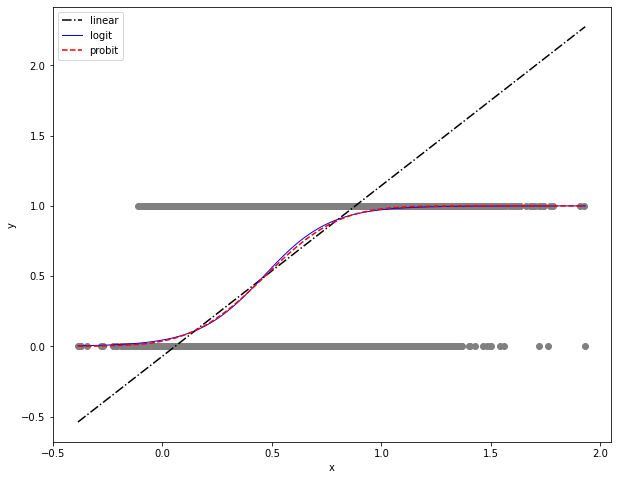

In [55]:
# prediction for regular grid of x values:
predictions_lin = results_lin.predict(new_data)
predictions_logit = results_logit.predict(new_data)
predictions_probit = results_probit.predict(new_data)

# scatter plot and fitted values:
x = results_lin.fittedvalues
y = df2['CARDIO_DISEASE']
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(x, y, color='grey', marker='o', linestyle='')
plt.plot(new_data['fitted'], predictions_lin,
         color='black', linestyle='-.', label='linear')
plt.plot(new_data['fitted'], predictions_logit,
         color='blue', linestyle='-', linewidth=1, label='logit')
plt.plot(new_data['fitted'], predictions_probit,
         color='red', linestyle='--', label='probit')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

### Confusion Matrix and Other Classification Metrics

In [65]:
# Confusion Matrix for logit model
from sklearn.metrics import confusion_matrix
predictions1 = np.where(results_logit.predict() > .5, 1, 0)
actual1 = df2['CARDIO_DISEASE']
cm1 = confusion_matrix(actual1, predictions1)
cm1

array([[27298,  7444],
       [11296, 22745]])

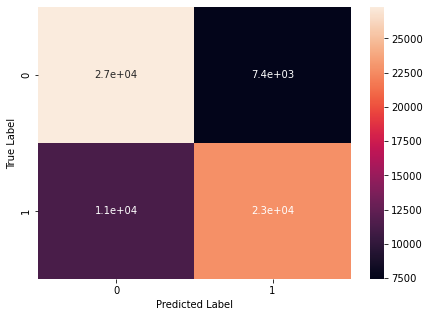

Accuracy = 0.7275489583181891
Specificity =  0.7857348454320419
Sensitivity =  0.6681648600217385


In [66]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

total1=sum(sum(cm1))
Accuracy = (cm1[0,0]+cm1[1,1])/total1
Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Accuracy =', Accuracy)
print('Specificity = ', Specificity)
print('Sensitivity = ', Sensitivity)

In [67]:
# Confusion Matrix for probit model
from sklearn.metrics import confusion_matrix
predictions2 = np.where(results_probit.predict() > .5, 1, 0)
actual2 = df2['CARDIO_DISEASE']
cm2 = confusion_matrix(actual2, predictions2)
cm2

array([[27386,  7356],
       [11444, 22597]])

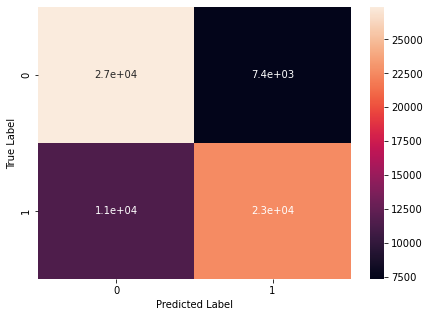

Accuracy = 0.7266766497535728
Specificity =  0.788267802659605
Sensitivity =  0.6638171616580006


In [68]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm2, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

total2=sum(sum(cm2))
Accuracy = (cm2[0,0]+cm2[1,1])/total2
Specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
Sensitivity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Accuracy =', Accuracy)
print('Specificity = ', Specificity)
print('Sensitivity = ', Sensitivity)

Since we are dealing with binary dependent variable, it is not appropriate for us to use linear probability model. When we are predicting the extreme values using LPM, the predicted values sometimes will exceed 0 and 1, so in this case, we will only compare logit and probit model.Logit and Probit models are statistical models that are used to model binary dependent variables. The logit model assumes a logistic distribution of errors, and the probit model assumes a normal distributed errors.In addition, the R^2 doesn't work in both models but we compare these models by using pseudo R^2. Moreover, by comparing the confusion matrix between logit and probit model, we found that the accuracy in prediction is better for logit model than probit model. So, since Logit model also has a higher Pseudo R^2, we choose it as our preferred model.

### 4. Using your preferred model, make 4 different predictions, and comment on their reliability.

According to the the confusion matrix for Logit model, the predictions will be accurate 72.75% of the time.

In [69]:
X_new = pd.DataFrame(
    {'AGE': [35, 43, 51, 59], 'GENDER': [1, 1.3, 1.6, 2],
     'HEIGHT': [65, 115, 165, 215], 'WEIGHT': [15, 60, 145, 190],
     'AP_HIGH': [65, 120, 175, 230], 'AP_LOW': [45, 90, 135, 180],
     'CHOLESTEROL': [1, 1.7, 2.3, 3], 'GLUCOSE': [1, 1.7, 2.3, 3],
     'SMOKE': [0, 0.3, 0.6, 1], 'ALCOHOL': [0, 0.3, 0.6, 1],
     'PHYSICAL_ACTIVITY': [0, 0.3, 0.6, 1]})

predictions_logit = results_logit.predict(X_new)
print(f'predictions_logit: \n{predictions_logit}\n')

predictions_logit: 
0    0.006574
1    0.368303
2    0.987085
3    0.999842
dtype: float64

